In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(1234)

In [2]:
from IPython.display import Image
# from numpy.core.umath_tests import matrix_multiply as mm

In [3]:
from scipy.optimize import minimize
from scipy.stats import bernoulli, binom

In [4]:
def neg_loglik(thetas, n, xs, zs):
    return -np.sum([binom(n, thetas[z]).logpmf(x) for (x, z) in zip(xs, zs)])

In [11]:
m = 10
theta_A = 0.8
theta_B = 0.3
theta_0 = [theta_A, theta_B]

coin_A = bernoulli(theta_A)
coin_B = bernoulli(theta_B)

xs = map(sum, [coin_A.rvs(m), coin_A.rvs(m), coin_B.rvs(m), coin_A.rvs(m), coin_B.rvs(m)])
zs = [0, 0, 1, 0, 1]

In [12]:
xs=list(xs)

In [13]:
xs = np.array(xs)
xs

array([7, 9, 2, 8, 2], dtype=int64)

In [14]:
ml_A = np.sum(xs[[0,1,3]])/(3.0*m)
ml_B = np.sum(xs[[2,4]])/(2.0*m)
ml_A, ml_B

(0.8, 0.2)

In [16]:
bnds = [(0,1), (0,1)]
minimize(neg_loglik, [0.5, 0.5], args=(m, xs, zs),
         bounds=bnds, method='tnc', options={'maxfun': 100})

     fun: 6.510056872071487
     jac: array([-0.00012239,  0.00022888])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 63
     nit: 7
  status: 1
 success: True
       x: array([0.79999934, 0.20000183])

In [33]:
xs = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
print(xs[0])
print(xs.shape)
thetas = np.array([[0.6, 0.4], [0.5, 0.5]])
print("thetas[0] : ",thetas[0])
print("thetas[1] : ",thetas[1])

tol = 0.01
max_iter = 100

ll_old = 0
for i in range(max_iter):
    ws_A = []
    ws_B = []

    vs_A = []
    vs_B = []

    ll_new = 0

    # E-step: calculate probability distributions over possible completions
    for x in xs:

        # multinomial (binomial) log likelihood
        ll_A = np.sum([x*np.log(thetas[0])])
        ll_B = np.sum([x*np.log(thetas[1])])

        # [EQN 1]
        denom = np.exp(ll_A) + np.exp(ll_B)
        w_A = np.exp(ll_A)/denom
        w_B = np.exp(ll_B)/denom

        ws_A.append(w_A)
        ws_B.append(w_B)

        # used for calculating theta
        print("w_A 값) :  ", w_A)
        print("np.dot(w_A, x) :  ", np.dot(w_A,x))
        vs_A.append(np.dot(w_A, x))
        print("w_B 값) :  ", w_B)
        print("np.dot(w_B, x) :  ", np.dot(w_B,x))
        vs_B.append(np.dot(w_B, x))

        # update complete log likelihood
        ll_new += w_A * ll_A + w_B * ll_B
        print("ll_new 값) :  ", ll_new)

    # M-step: update values for parameters given current distribution
    # [EQN 2]
    print("vs_A :  ",vs_A)
    print("np.sum(vs_A,0) :  ", np.sum(vs_A,0))
    print("np.sum(vs_A) :  ", np.sum(vs_A))
    thetas[0] = np.sum(vs_A, 0)/np.sum(vs_A)
    print("thetas[0] iteration",i,"___",thetas[0])
    print("vs_B :  ",vs_B)
    print("np.sum(vs_B,0) :  ", np.sum(vs_B,0))
    print("np.sum(vs_B) :  ", np.sum(vs_B))
    thetas[1] = np.sum(vs_B, 0)/np.sum(vs_B)
    print("thetas[1] iteration",i,"___",thetas[1],"\n")
    # print distribution of z for each x and current parameter estimate

    print("Iteration: %d" % (i+1))
    print("theta_A = %.2f, theta_B = %.2f, ll = %.2f" % (thetas[0,0], thetas[1,0], ll_new), "\n")

    if np.abs(ll_new - ll_old) < tol:
        break
    ll_old = ll_new

[5 5]
(5, 2)
thetas[0] :  [0.6 0.4]
thetas[1] :  [0.5 0.5]
w_A 값) :   0.4491489261009366
np.dot(w_A, x) :   [2.24574463 2.24574463]
w_B 값) :   0.5508510738990634
np.dot(w_B, x) :   [2.75425537 2.75425537]
ll_new 값) :   -7.023147580599807
w_A 값) :   0.804985517232276
np.dot(w_A, x) :   [7.24486966 0.80498552]
w_B 값) :   0.19501448276772404
np.dot(w_B, x) :   [1.75513034 0.19501448]
ll_new 값) :   -12.8133507989856
w_A 값) :   0.7334671580091431
np.dot(w_A, x) :   [5.86773726 1.46693432]
w_B 값) :   0.26653284199085686
np.dot(w_B, x) :   [2.13226274 0.53306568]
ll_new 값) :   -19.002344544562337
w_A 값) :   0.35215613384625916
np.dot(w_A, x) :   [1.40862454 2.1129368 ]
w_B 값) :   0.6478438661537408
np.dot(w_B, x) :   [2.59137546 3.8870632 ]
ll_new 값) :   -26.14848195387345
w_A 값) :   0.6472151158991253
np.dot(w_A, x) :   [4.53050581 1.94164535]
w_B 값) :   0.3527848841008748
np.dot(w_B, x) :   [2.46949419 1.05835465]
ll_new 값) :   -32.68721052517165
vs_A :   [array([2.24574463, 2.24574463]), a

In [34]:
import scipy.stats as st

In [35]:
def f(x, y):
    z = np.column_stack([x.ravel(), y.ravel()])
    return (0.1*st.multivariate_normal([0,0], 1*np.eye(2)).pdf(z) +
            0.4*st.multivariate_normal([3,3], 2*np.eye(2)).pdf(z) +
            0.5*st.multivariate_normal([0,5], 3*np.eye(2)).pdf(z))

In [36]:
f(np.arange(3), np.arange(3))

array([0.01668036, 0.01172299, 0.02263674])

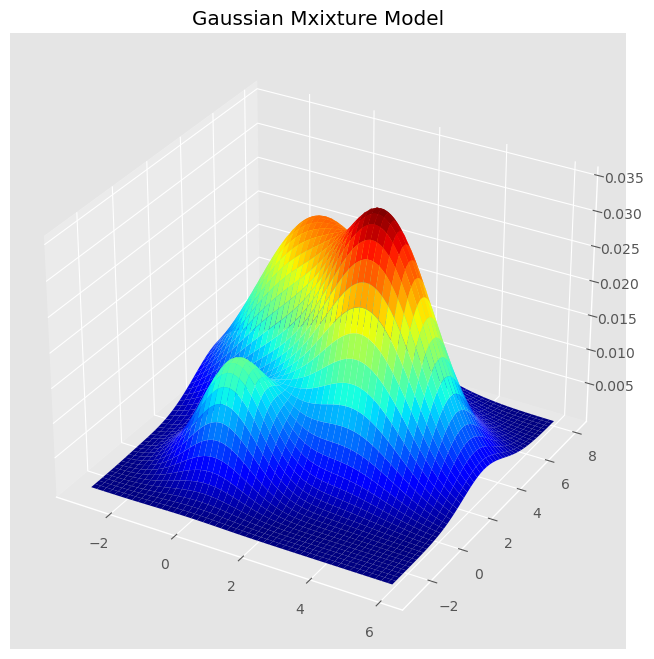

In [37]:
s = 200
x = np.linspace(-3, 6, s)
y = np.linspace(-3, 8, s)
X, Y = np.meshgrid(x, y)
Z = np.reshape(f(X, Y), (s, s))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
plt.title('Gaussian Mxixture Model');

In [38]:
from scipy.stats import multivariate_normal as mvn

In [39]:
def em_gmm_orig(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n, p = xs.shape
    k = len(pis)

    ll_old = 0
    for i in range(max_iter):
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(len(mus)):
            for i in range(n):
                ws[j, i] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
        ws /= ws.sum(0)

        # M-step
        pis = np.zeros(k)
        for j in range(len(mus)):
            for i in range(n):
                pis[j] += ws[j, i]
        pis /= n

        mus = np.zeros((k, p))
        for j in range(k):
            for i in range(n):
                mus[j] += ws[j, i] * xs[i]
            mus[j] /= ws[j, :].sum()

        sigmas = np.zeros((k, p, p))
        for j in range(k):
            for i in range(n):
                ys = np.reshape(xs[i]- mus[j], (2,1))
                sigmas[j] += ws[j, i] * np.dot(ys, ys.T)
            sigmas[j] /= ws[j,:].sum()

        # update complete log likelihoood
        ll_new = 0.0
        for i in range(n):
            s = 0
            for j in range(k):
                s += pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
            ll_new += np.log(s)

        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return ll_new, pis, mus, sigmas

In [40]:
np.random.seed(123)

# create data set
n = 1000
_mus = np.array([[0,4], [-2,0]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[1,0],[0,2]]])
_pis = np.array([0.6, 0.4])
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

# initial guesses for parameters
pis = np.random.random(2)
pis /= pis.sum()
mus = np.random.random((2,2))
sigmas = np.array([np.eye(2)] * 2)

In [41]:
%%time
ll1, pis1, mus1, sigmas1 = em_gmm_orig(xs, pis, mus, sigmas)

CPU times: total: 13.6 s
Wall time: 13.8 s


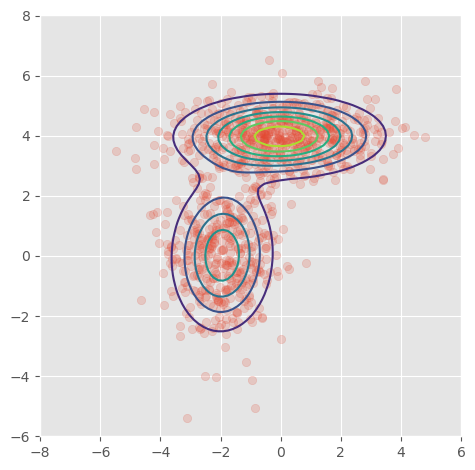

In [43]:
intervals = 101
ys = np.linspace(-8,8,intervals)
X, Y = np.meshgrid(ys, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis1, mus1, sigmas1):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

ax = plt.subplot(111)
plt.scatter(xs[:,0], xs[:,1], alpha=0.2)
plt.contour(X, Y, z)
plt.axis([-8,6,-6,8])
ax.axes.set_aspect('equal')
plt.tight_layout()

In [46]:
def em_gmm_vect(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n, p = xs.shape
    k = len(pis)

    ll_old = 0
    for i in range(max_iter):
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(k):
            ws[j, :] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs)
        ws /= ws.sum(0)

        # M-step
        pis = ws.sum(axis=1)
        pis /= n

        mus = np.dot(ws, xs)
        mus /= ws.sum(1)[:, None]

        sigmas = np.zeros((k, p, p))
        for j in range(k):
            ys = xs - mus[j, :]
            sigmas[j] = (ws[j,:,None,None] * ys[:,:,None]@ys[:,None,:]).sum(axis=0)
        sigmas /= ws.sum(axis=1)[:,None,None]

        # update complete log likelihoood
        ll_new = 0
        for pi, mu, sigma in zip(pis, mus, sigmas):
            ll_new += pi*mvn(mu, sigma).pdf(xs)
        ll_new = np.log(ll_new).sum()

        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return ll_new, pis, mus, sigmas

In [47]:
%%time
ll1, pis1, mus1, sigmas1 = em_gmm_vect(xs, pis, mus, sigmas)

CPU times: total: 46.9 ms
Wall time: 41 ms


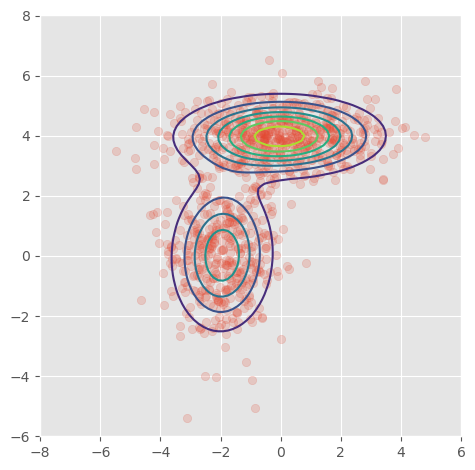

In [48]:
intervals = 101
ys = np.linspace(-8,8,intervals)
X, Y = np.meshgrid(ys, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis1, mus1, sigmas1):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

ax = plt.subplot(111)
plt.scatter(xs[:,0], xs[:,1], alpha=0.2)
plt.contour(X, Y, z)
plt.axis([-8,6,-6,8])
ax.axes.set_aspect('equal')
plt.tight_layout()

## Gaussian Mixture Model using Expectation Maximisation Algorithm

The biggest limitation of K-Means clustering is that each cluster has the same diagonal covariance matrix. This produces spherical clusters that are quite inflexible in terms of the types of distributions they can model. GMM solves this issue by forming clusters of different elongated widths.

Another point to note is that K-Means clustering follows hard clustering i.e each point in our dataset can belong to only one cluster. It does not give the probability distribution of each point belonging to all clusters.

# Defining our own GMM class

Reference: http://www.oranlooney.com/post/ml-from-scratch-part-5-gmm/

In [49]:
import numpy as np
from scipy.stats import multivariate_normal 

class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter) 

    def initialize(self, X):
        # returns the (r,c) value of the numpy array of X
        self.shape = X.shape 
        # n has the number of rows while m has the number of columns of dataset X
        self.n, self.m = self.shape 
        

        # initial weights given to each cluster are stored in phi or P(Ci=j)
        self.phi = np.full(shape=self.k, fill_value=1/self.k) 

        # initial weights given to each data point wrt to each cluster or P(Xi/Ci=j)
        self.weights = np.full(shape=self.shape, fill_value=1/self.k)
        
        # dataset is divided randomly into k parts of unequal sizes
        random_row = np.random.randint(low=0, high=self.n, size=self.k)

        # initial value of mean of k Gaussians
        self.mu = [  X[row_index,:] for row_index in random_row ] 

        # initial value of covariance matrix of k Gaussians
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ] 
        # theta =(mu1,sigma1,mu2,simga2......muk,sigmak)

    # E-Step: update weights and phi holding mu and sigma constant
    def e_step(self, X):
        # updated weights or P(Xi/Ci=j)
        self.weights = self.predict_proba(X)
        # mean of sum of probability of all data points wrt to one cluster is new updated probability of cluster k or (phi)k
        self.phi = self.weights.mean(axis=0)

    # M-Step: update meu and sigma holding phi and weights constant
    def m_step(self, X):
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()

            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T,aweights=(weight/total_weight).flatten(), bias=True)

    # responsible for clustering the data points correctly
    def fit(self, X):
        # initialise parameters like weights, phi, meu, sigma of all Gaussians in dataset X
        self.initialize(X)
        plt.figure(figsize=(16, 25))
        for iteration in range(self.max_iter):
            permutation = np.array([mode(iris.target[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])
            permuted_prediction = permutation[gmm.predict(X)]
            print('\nThe accuracy of the permuted prediction against target before iteration ',iteration+1,end="")
            print(': ',np.mean(iris.target == permuted_prediction))
            print('\n')
            confusion_matrix(iris.target, permuted_prediction)
            plt.title(' Iteration Cluster')
            plt.subplot(5,3,iteration+1)
            clusters=permuted_prediction
            plt.xlabel(iris.feature_names[0])
            plt.ylabel(iris.feature_names[1])
            plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
            plt.grid()
            plt.tight_layout()
            # iterate to update the value of P(Xi/Ci=j) and (phi)k
            self.e_step(X)
            # iterate to update the value of meu and sigma as the clusters shift
            self.m_step(X)
            

    # predicts probability of each data point wrt each cluster
    def predict_proba(self, X):
        # Creates a n*k matrix denoting probability of each point wrt each cluster 
        likelihood = np.zeros( (self.n, self.k) ) 
        for i in range(self.k):
            distribution = multivariate_normal(mean=self.mu[i],cov=self.sigma[i])
            # pdf : probability denisty function
            likelihood[:,i] = distribution.pdf(X) 

        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    # predict function 
    def predict(self, X):
        weights = self.predict_proba(X)
        # datapoint belongs to cluster with maximum probability
        # returns this value
        return np.argmax(weights, axis=1)


# Testing our Model on Iris dataset

In [50]:
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

In [51]:
# convert numpy array to DataFrame
import pandas as pd
Y = pd.DataFrame(X, columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width'])
Y.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Visualising Iris Dataset

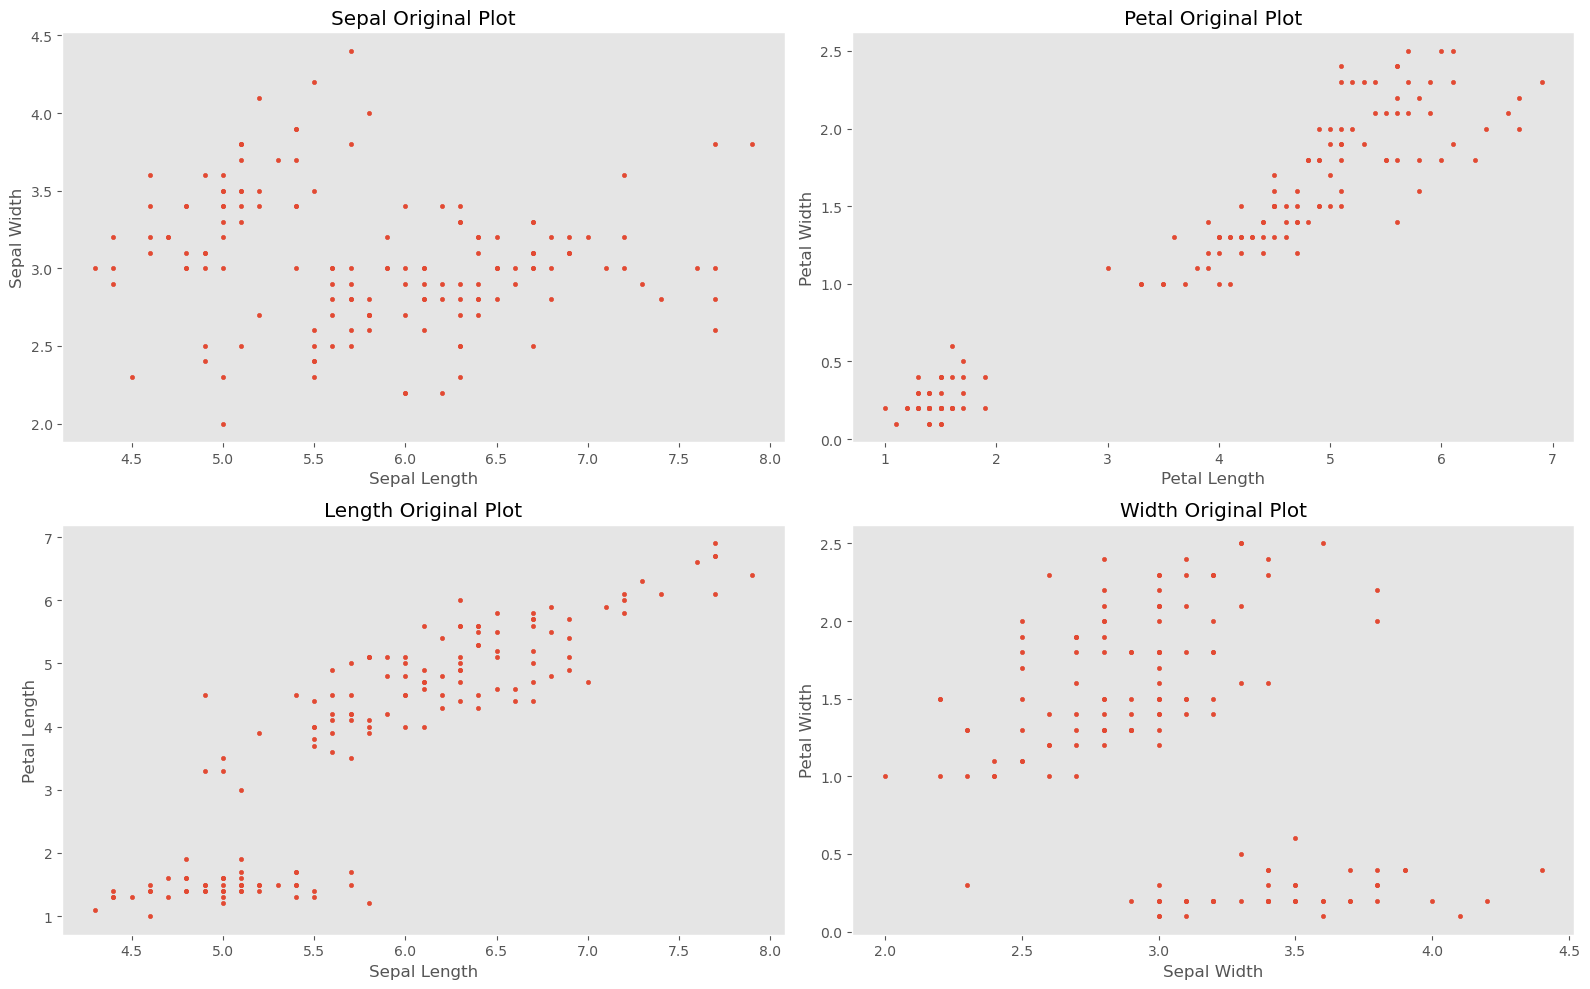

In [52]:
plt.figure(figsize=(16,10))
#scatter plot of sepal length vs sepal width 
plt.subplot(2,2,1)                                   
plt.scatter(list(Y.iloc[:,0]), list(Y.iloc[:,1]), marker='.')                                                                        
plt.xlabel('Sepal Length')                                                 
plt.ylabel('Sepal Width')                                         
plt.title('Sepal Original Plot')
plt.grid()                                                                                           
plt.tight_layout()

#scatter plot of petal length vs petal width
plt.subplot(2,2,2)                                   
plt.scatter(list(Y.iloc[:,2]), list(Y.iloc[:,3]), marker='.')                                                                        
plt.xlabel('Petal Length')                                                 
plt.ylabel('Petal Width')                                                 
plt.title('Petal Original Plot')                                           
plt.grid()                                                                 
plt.tight_layout()


#scatter plot of petal length vs sepal length
plt.subplot(2,2,3)                                   
plt.scatter(list(Y.iloc[:,0]), list(Y.iloc[:,2]), marker='.')                                                                       
plt.xlabel('Sepal Length')                                                 
plt.ylabel('Petal Length')                                                 
plt.title('Length Original Plot')                                           
plt.grid()                                                                 
plt.tight_layout()

#scatter plot of petal width vs sepal width
plt.subplot(2,2,4)                                   
plt.scatter(list(Y.iloc[:,1]), list(Y.iloc[:,3]), marker='.')                                                                       
plt.xlabel('Sepal Width')                                                 
plt.ylabel('Petal Width')                                                 
plt.title('Width Original Plot')                                            
plt.grid()                                                                 
plt.tight_layout()

# Plotting our Predictions

In [53]:
def jitter(x):
    return x + np.random.uniform(low=-0.05, high=0.05, size=x.shape)

def plot_axis_pairs(X, axis_pairs, clusters, classes):
    n_rows = len(axis_pairs) // 2
    n_cols = 2
    plt.figure(figsize=(16, 10))
    # iterates through all the plots
    for index, (x_axis, y_axis) in enumerate(axis_pairs):
        plt.subplot(n_rows, n_cols, index+1)
        plt.title('Final Cluster',fontsize=26)
        plt.xlabel(iris.feature_names[x_axis])
        plt.ylabel(iris.feature_names[y_axis])
        plt.scatter(jitter(X[:, x_axis]), jitter(X[:, y_axis]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
        plt.grid()
        plt.tight_layout()

C:\Users\unhoc\AppData\Local\Temp\ipykernel_11664\1349575316.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  permutation = np.array([mode(iris.target[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])
C:\Users\unhoc\AppData\Local\Temp\ipykernel_11664\1349575316.py:61: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,3,iteration+1)
C:\Users\unhoc\AppData\Local\Temp\ipykernel_11664\1349575316.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the d


The accuracy of the permuted prediction against target before iteration  1:  0.6266666666666667



The accuracy of the permuted prediction against target before iteration  2:  0.68



The accuracy of the permuted prediction against target before iteration  3:  0.7866666666666666




C:\Users\unhoc\AppData\Local\Temp\ipykernel_11664\1349575316.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  permutation = np.array([mode(iris.target[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])
C:\Users\unhoc\AppData\Local\Temp\ipykernel_11664\1349575316.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce


The accuracy of the permuted prediction against target before iteration  4:  0.8533333333333334



The accuracy of the permuted prediction against target before iteration  5:  0.86




C:\Users\unhoc\AppData\Local\Temp\ipykernel_11664\1349575316.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  permutation = np.array([mode(iris.target[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])
C:\Users\unhoc\AppData\Local\Temp\ipykernel_11664\1349575316.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce


The accuracy of the permuted prediction against target before iteration  6:  0.8733333333333333



The accuracy of the permuted prediction against target before iteration  7:  0.8866666666666667




C:\Users\unhoc\AppData\Local\Temp\ipykernel_11664\1349575316.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  permutation = np.array([mode(iris.target[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])



The accuracy of the permuted prediction against target before iteration  8:  0.9




C:\Users\unhoc\AppData\Local\Temp\ipykernel_11664\1349575316.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  permutation = np.array([mode(iris.target[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])



The accuracy of the permuted prediction against target before iteration  9:  0.9466666666666667




C:\Users\unhoc\AppData\Local\Temp\ipykernel_11664\1349575316.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  permutation = np.array([mode(iris.target[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])



The accuracy of the permuted prediction against target before iteration  10:  0.9733333333333334




C:\Users\unhoc\AppData\Local\Temp\ipykernel_11664\1349575316.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  permutation = np.array([mode(iris.target[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])



The accuracy of the permuted prediction against target before iteration  11:  0.96




C:\Users\unhoc\AppData\Local\Temp\ipykernel_11664\1349575316.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  permutation = np.array([mode(iris.target[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])



The accuracy of the permuted prediction against target before iteration  12:  0.9533333333333334




C:\Users\unhoc\AppData\Local\Temp\ipykernel_11664\1349575316.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  permutation = np.array([mode(iris.target[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])



The accuracy of the permuted prediction against target before iteration  13:  0.9666666666666667




C:\Users\unhoc\AppData\Local\Temp\ipykernel_11664\1349575316.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  permutation = np.array([mode(iris.target[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])



The accuracy of the permuted prediction against target before iteration  14:  0.9666666666666667




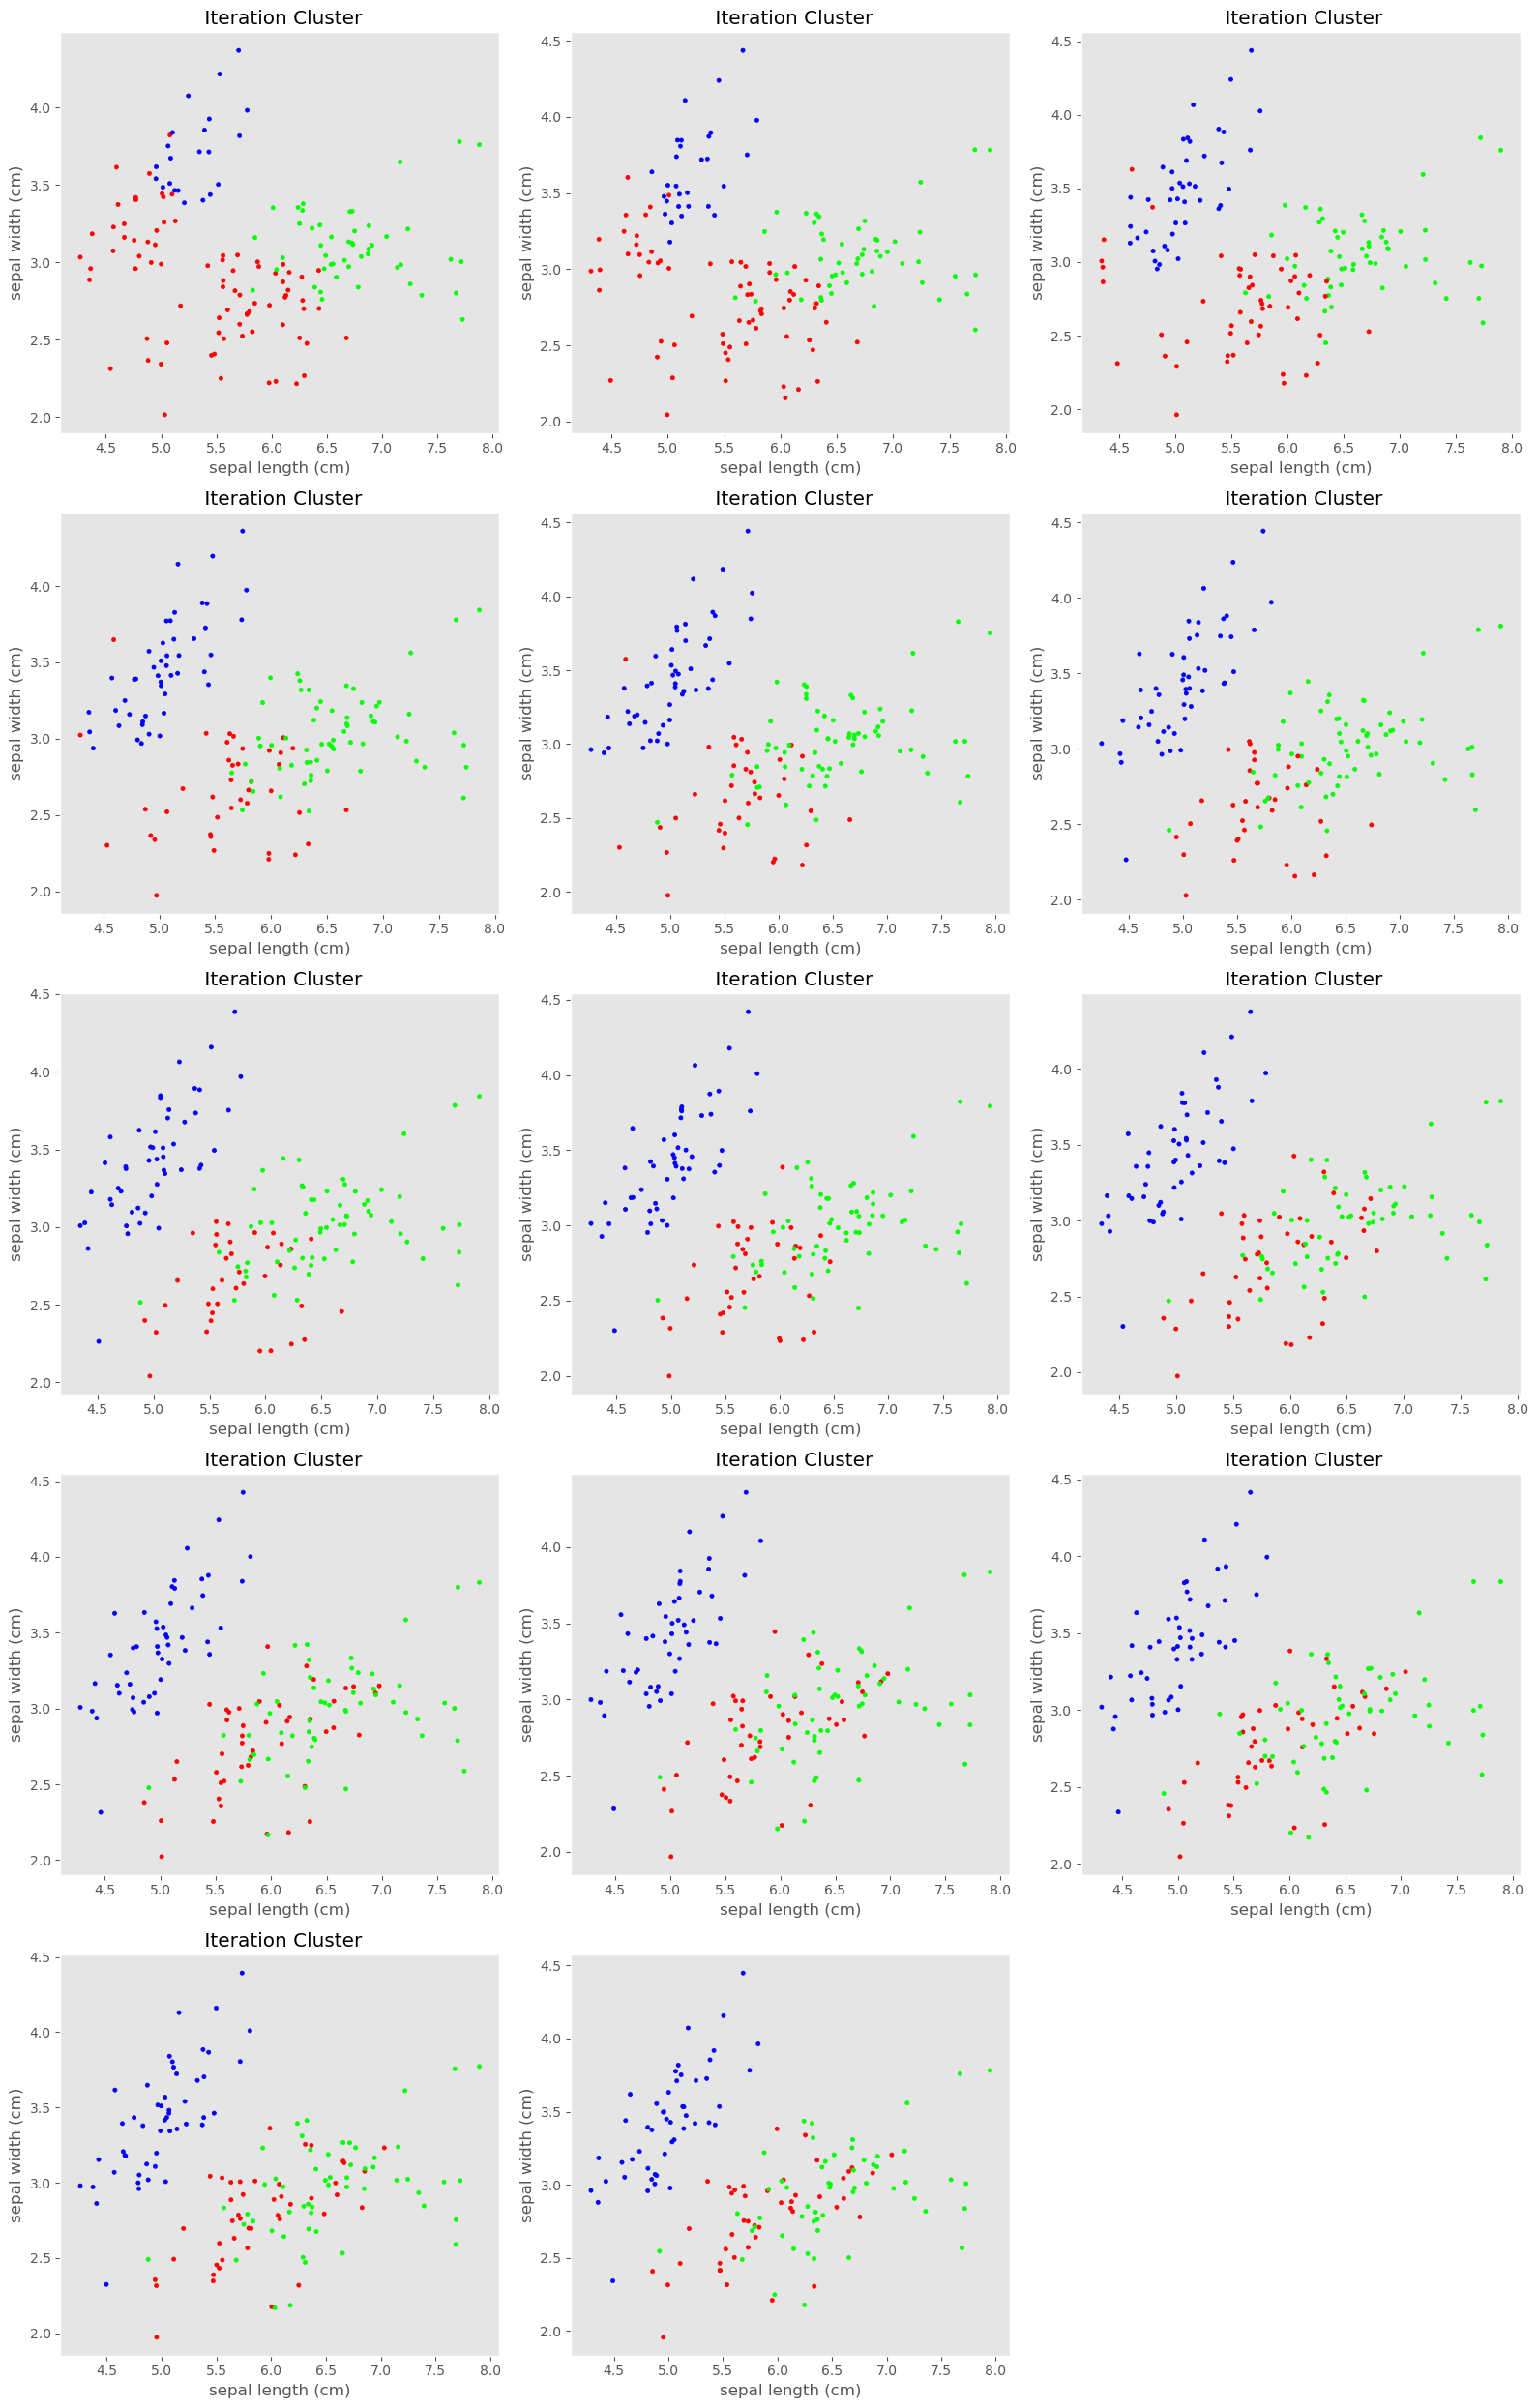

In [54]:
np.random.seed(42)
gmm = GMM(k=3, max_iter=14)
gmm.fit(X)

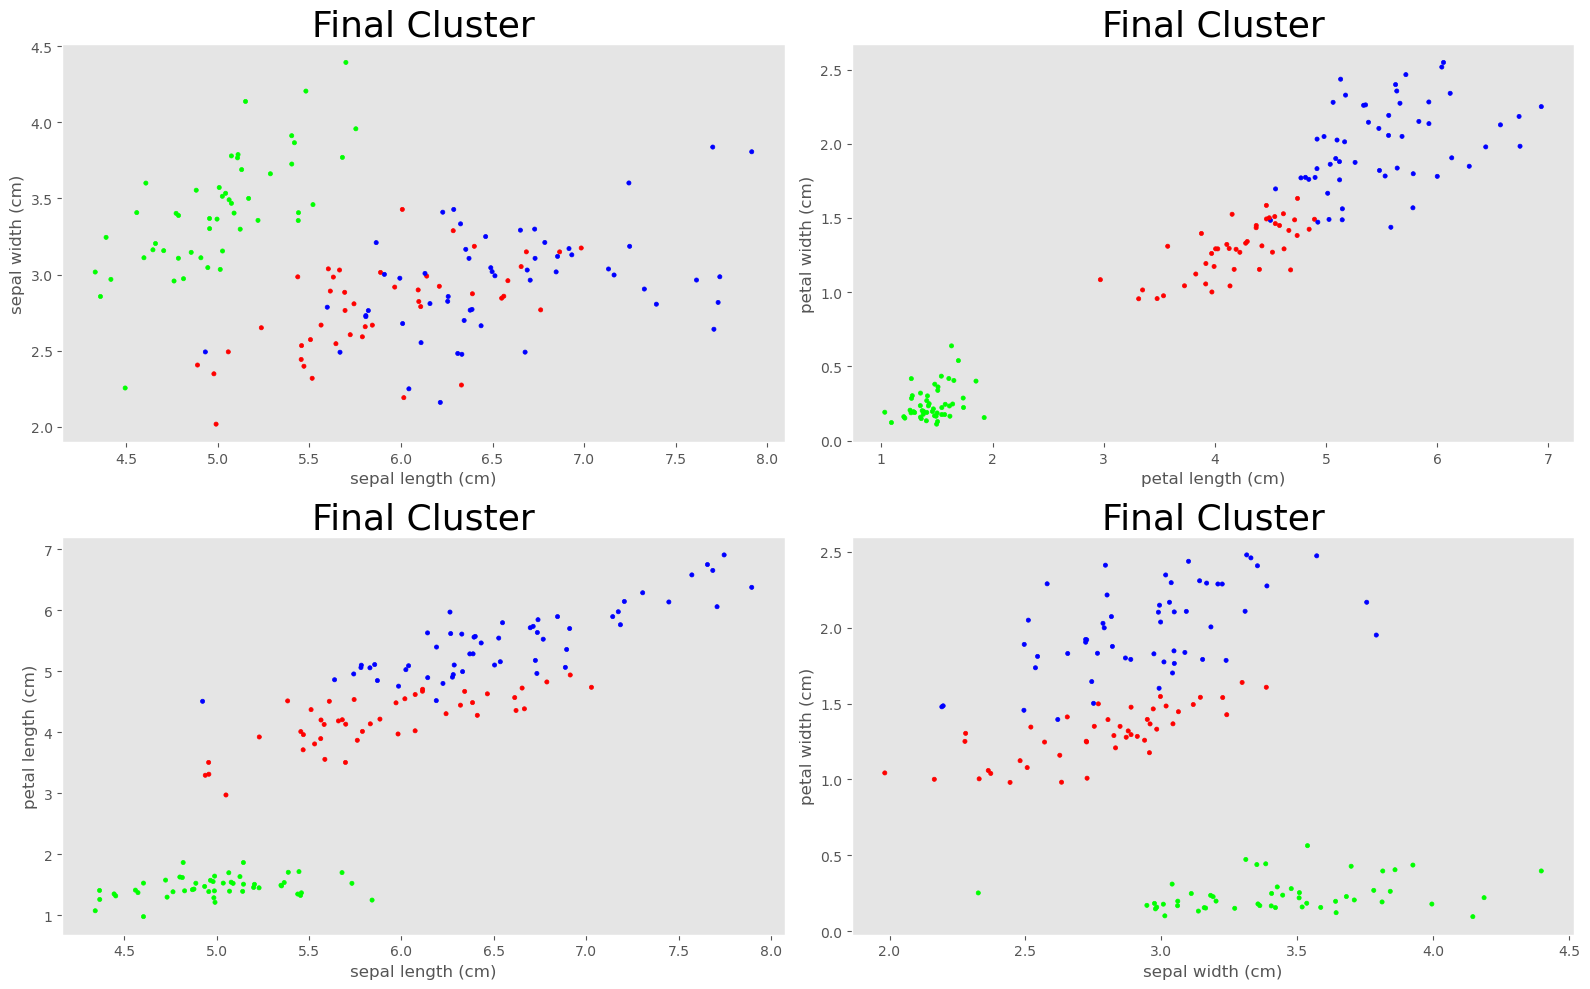

In [57]:
plot_axis_pairs(X=X,axis_pairs=[ (0,1), (2,3),(0,2), (1,3) ],clusters=gmm.predict(X),classes=iris.target)